In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


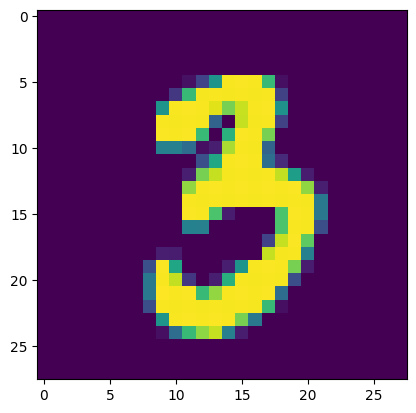

In [12]:
# Cargar datos de entrenamiento y prueba
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Forma de las imagenes 28 x 28 pixeles (60 000 imágenes)
x_train.shape

# Mostrar imagen de la posición
plt.imshow(x_train[890])

In [14]:
# Estandarizar los valores entre 0 y 1 pixeles (0,255)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255